## **Overview**

The objective of this project is to conduct a comprehensive analysis of the user's music preferences and tastes using data from Spotify's API and the user's streaming history. By leveraging Python programming language and various data analysis libraries, the project aims to provide insights into the user's listening habits, preferred artists, tracks, and other relevant metrics. The ultimate goal is to gain a deeper understanding of the user's musical preferences and behavior.

## **Key Objectives:**

1. **Data Collection:**
   - Utilize the publicly available API of Spotify to gather data on artists and tracks.
   - Obtain my streaming history data from Spotify's Account Privacy page.

2. **Data Preprocessing:**
   - Cleanse and preprocess the data obtained from both sources to ensure consistency and accuracy.
   - Handle missing values, duplicates, and other anomalies in the data.

3. **Exploratory Data Analysis (EDA):**
   - Perform exploratory data analysis to uncover patterns and trends in my music listening habits.
   - Visualize the distribution of artists, and tracks in my listening history.
   - Identify correlations between different variables such as time of day, day of week, and music preferences.

4. **Feature Engineering:**
   - Extract relevant features from the data to facilitate further analysis.
   - Create new variables or metrics to capture specific aspects of my music preferences.

5. **Modeling and Analysis:**
   - Apply machine learning algorithms or statistical models to predict my preferences or recommend new music.
   - Conduct cluster analysis to group similar genres, artists, or tracks based on my behavior.
   - Explore sentiment analysis to understand the emotional response associated with different types of music.

6. **Insights and Recommendations:**
   - Summarize findings from the analysis and derive actionable insights about my music preferences.
   - Provide personalized recommendations for new music, playlists, or artists based on the analysis results.
   - Offer suggestions for improving my music listening experience on Spotify.

## **Tools and Technologies:**

- Python programming language
- Pandas, NumPy for data manipulation
- Matplotlib, Seaborn for data visualization
- Scikit-learn for machine learning algorithms
- Spotify API for data retrieval
- Jupyter Notebook for interactive development and documentation

## **Import Package**

In [1]:
# Importing all the required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pio.renderers.default = "svg"

## **Data Overview**

### **Read Data**

In [2]:
spotify_data = pd.read_csv(r'D:\Project\Repository\spotify-analysis\Data\all_spotify_data.csv', low_memory=False)

In [3]:
spotify_data.head()

,ts,platform,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,episode_name,episode_show_name,spotify_episode_uri,reason_start,...,acousticness,danceability,energy,instrumentalness,liveness,speechiness,loudness,mode,tempo,time_signature
0,2019-02-08T22:51:39Z,Android,31267,NaN,NaN,NaN,"8 - ""Taste"" by Rebecca Woodmass",A Little Poem with Rebecca Woodmass,spotify:episode:0lY0dPwAfZoPgSepp1eCrp,clickrow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-09T03:50:12Z,Android,5463,NaN,NaN,NaN,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,clickrow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-02-09T03:50:33Z,Android,5463,NaN,NaN,NaN,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,clickrow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-02-09T03:50:51Z,Android,5463,NaN,NaN,NaN,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,clickrow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-02-09T11:05:55Z,Android,77742,NaN,NaN,NaN,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,appload,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Detailed Data Information**

In [4]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129291 entries, 0 to 129290
Data columns (total 35 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ts                                 129291 non-null  object 
 1   platform                           129291 non-null  object 
 2   ms_played                          129291 non-null  int64  
 3   master_metadata_track_name         126946 non-null  object 
 4   master_metadata_album_artist_name  126946 non-null  object 
 5   master_metadata_album_album_name   126946 non-null  object 
 6   episode_name                       2268 non-null    object 
 7   episode_show_name                  2265 non-null    object 
 8   spotify_episode_uri                2268 non-null    object 
 9   reason_start                       129291 non-null  object 
 10  reason_end                         129291 non-null  object 
 11  shuffle                            1292

In [5]:
spotify_data.describe()

,ms_played,offline_timestamp,length,track_popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,loudness,mode,tempo,time_signature
count,1.292910e+05,1.292910e+05,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000
mean,1.706095e+05,6.602668e+11,225346.360055,67.454704,0.493939,0.546504,0.488246,0.069886,0.157588,0.050309,-8.672958,0.865396,118.507806,3.916290
std,1.345194e+05,7.959263e+11,54444.477531,15.252182,0.343756,0.137735,0.220862,0.221245,0.106004,0.046766,4.025461,0.341308,29.829805,0.328999
min,0.000000e+00,0.000000e+00,48000.000000,2.000000,0.000026,0.079300,0.002440,0.000000,0.033400,0.023200,-44.677000,0.000000,52.463000,1.000000
25%,1.103370e+05,1.672713e+09,194469.000000,60.000000,0.130000,0.447000,0.319000,0.000000,0.097400,0.030700,-10.917000,1.000000,95.985000,4.000000
50%,1.857730e+05,1.701224e+09,218735.000000,70.000000,0.513000,0.559000,0.463000,0.000011,0.113000,0.036300,-7.680000,1.000000,114.924000,4.000000
75%,2.245420e+05,1.616122e+12,252266.000000,77.000000,0.831000,0.643000,0.661000,0.001010,0.170000,0.051900,-5.927000,1.000000,139.916000,4.000000
max,7.575928e+06,1.665470e+12,493400.000000,96.000000,0.996000,0.925000,0.988000,0.982000,0.626000,0.463000,-1.329000,1.000000,199.811000,5.000000


In [6]:
spotify_data.describe(include='object')

,ts,platform,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,skipped,track_uri,track_id,track_name,release_date,album_id,album_name,artist_name
count,129291,129291,126946,126946,126946,2268,2265,2268,129291,129291,71953,126946,19472,19472,19472,19472,19472,19472
unique,103535,2,13737,6102,10997,1396,296,1397,9,10,4,16706,564,529,348,407,402,117
top,2022-01-01T11:42:30Z,Windows,Location,LANY,gg bb xx,YOASOBI THE BOOK 2 Spotify Edition,Mishary Rashid Alafasy,spotify:episode:0sPNGPetAt5PP9IXKD6Bko,trackdone,trackdone,False,152lZdxL1OR0ZMW6KquMif,1bD4DokWm69ZwGBQ75jAga,You Can Cry,2019-11-29,1DAuVHMlBvIjzWZALSUXbn,Menari Dengan Bayangan,LANY
freq,331,115003,760,4546,1084,86,343,86,90065,89606,35601,757,254,254,607,607,607,986


## **Data Preprocessing**

### **Data Type**

#### **Checking Data Type**

In [7]:
spotify_data.dtypes

ts                                    object
platform                              object
ms_played                              int64
master_metadata_track_name            object
master_metadata_album_artist_name     object
master_metadata_album_album_name      object
episode_name                          object
episode_show_name                     object
spotify_episode_uri                   object
reason_start                          object
reason_end                            object
shuffle                                 bool
skipped                               object
offline                                 bool
offline_timestamp                      int64
incognito_mode                          bool
track_uri                             object
track_id                              object
track_name                            object
release_date                          object
length                               float64
track_popularity                     float64
album_id  

#### **Fixing Data Type**

In [8]:
# Convert 'ts' column to datetime format
spotify_data['ts'] = pd.to_datetime(spotify_data['ts'])

In [9]:
spotify_data['ts'].dtypes

datetime64[ns, UTC]

### **Data Duplicates**

#### **Identifying Data Duplicates**

In [10]:
spotify_data.duplicated().value_counts()

False    112881
True      16410
Name: count, dtype: int64

In [11]:
duplicate_rows = spotify_data[spotify_data.duplicated()]
duplicate_rows.head()

,ts,platform,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,episode_name,episode_show_name,spotify_episode_uri,reason_start,...,acousticness,danceability,energy,instrumentalness,liveness,speechiness,loudness,mode,tempo,time_signature
1456,2019-06-24 03:29:12+00:00,Android,25909,Complicated,Olivia O'Brien,Complicated,NaN,NaN,NaN,trackdone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3418,2019-10-21 09:28:58+00:00,Android,247108,Something Just Like This,The Chainsmokers,Memories...Do Not Open,NaN,NaN,NaN,trackdone,...,0.0498,0.617,0.635,0.000014,0.164,0.0317,-6.769,0.0,103.019,4.0
4549,2019-11-23 10:44:28+00:00,Android,4007,Something Just Like This,The Chainsmokers,Memories...Do Not Open,NaN,NaN,NaN,clickrow,...,0.0498,0.617,0.635,0.000014,0.164,0.0317,-6.769,0.0,103.019,4.0
4832,2019-11-30 11:14:35+00:00,Android,247108,Something Just Like This,The Chainsmokers,Memories...Do Not Open,NaN,NaN,NaN,trackdone,...,0.0498,0.617,0.635,0.000014,0.164,0.0317,-6.769,0.0,103.019,4.0
5137,2019-12-08 04:23:33+00:00,Android,247108,Something Just Like This,The Chainsmokers,Memories...Do Not Open,NaN,NaN,NaN,trackdone,...,0.0498,0.617,0.635,0.000014,0.164,0.0317,-6.769,0.0,103.019,4.0


### **Missing Values**

#### **Identifying Missing Values**

In [12]:
# Function to calculate missing values by column 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
missing_values = missing_values_table(spotify_data)
missing_values

Your selected dataframe has 35 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
episode_show_name,127026,98.2
episode_name,127023,98.2
spotify_episode_uri,127023,98.2
album_id,109819,84.9
artist_name,109819,84.9
tempo,109819,84.9
mode,109819,84.9
loudness,109819,84.9
speechiness,109819,84.9
liveness,109819,84.9


#### **Missing Values Handling**

In [14]:
# # Menghapus baris yang memiliki nilai null di kolom yang dipilih
# merged_data_cleaned = merged_data.dropna(subset=['track_id', 'track_name', 'release_date', 'length', 'popularity', 
#                                                  'album_id', 'album_name', 'artist_name', 'acousticness', 
#                                                  'danceability', 'energy', 'instrumentalness', 'liveness', 
#                                                  'speechiness', 'loudness', 'mode', 'tempo', 'time_signature'])

In [15]:
# merged_data_cleaned.info()

In [16]:
# merged_data_cleaned.head()

In [17]:
# Menghapus baris yang memiliki duplikat berdasarkan spotify_track_uri
# merged_data_cleaned = merged_data_cleaned.drop_duplicates(subset=['spotify_track_uri'])

# Menampilkan DataFrame hasil setelah menghapus data duplikat berdasarkan spotify_track_uri
# print(merged_data_cleaned)

In [18]:
# merged_data_cleaned.head()

In [19]:
# merged_data_cleaned.info()

### **Features List**

In [20]:
# list numerical features in streaming history music dataframe
numerical_features = list(spotify_data.select_dtypes(include=['int64','float64']).columns)
print('List of numerical featues {}'.format(numerical_features))

List of numerical featues ['ms_played', 'offline_timestamp', 'length', 'track_popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'loudness', 'mode', 'tempo', 'time_signature']


In [21]:
# list categorical features
categorical_features = list(spotify_data.select_dtypes(include=['object']).columns)
print('List of categorical featues {}'.format(categorical_features))

List of categorical featues ['platform', 'master_metadata_track_name', 'master_metadata_album_artist_name', 'master_metadata_album_album_name', 'episode_name', 'episode_show_name', 'spotify_episode_uri', 'reason_start', 'reason_end', 'skipped', 'track_uri', 'track_id', 'track_name', 'release_date', 'album_id', 'album_name', 'artist_name']


### **Outliers**

#### **Outlier Checking**

In [22]:
# # check the 16th first numerical features outliers
# fig, axes = plt.subplots(3, 5, figsize=(12, 6))
# for i, col in enumerate(numerical_features[0:14]):        
#     ax_ = sns.boxplot(x=spotify_data[col], ax=axes.flatten()[i])
# plt.tight_layout()

## **Exploratory Data Analysis**

### **Separate Music and Podcast from Streaming History**

#### **Music Streaming History**

In [23]:
# Make sure the data only includes music history
indices_to_drop = spotify_data[spotify_data['episode_name'].notnull() & spotify_data['episode_show_name'].notnull() & spotify_data['spotify_episode_uri'].notnull()].index
spotify_music = spotify_data.drop(indices_to_drop)

In [24]:
# Remove columns related to podcast
spotify_music = spotify_music.drop(columns=['episode_name', 'episode_show_name', 'spotify_episode_uri'])

In [25]:
spotify_music.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127026 entries, 5 to 129290
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype              
---  ------                             --------------   -----              
 0   ts                                 127026 non-null  datetime64[ns, UTC]
 1   platform                           127026 non-null  object             
 2   ms_played                          127026 non-null  int64              
 3   master_metadata_track_name         126946 non-null  object             
 4   master_metadata_album_artist_name  126946 non-null  object             
 5   master_metadata_album_album_name   126946 non-null  object             
 6   reason_start                       127026 non-null  object             
 7   reason_end                         127026 non-null  object             
 8   shuffle                            127026 non-null  bool               
 9   skipped                            70840 n

In [26]:
spotify_music.head()

,ts,platform,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,reason_start,reason_end,shuffle,skipped,...,acousticness,danceability,energy,instrumentalness,liveness,speechiness,loudness,mode,tempo,time_signature
5,2019-02-09 14:54:58+00:00,Android,47292,A Sky Full of Stars - Live at the Royal Albert...,Coldplay,Ghost Stories Live 2014,appload,endplay,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-02-09 14:55:31+00:00,Android,30126,Noi siamo infinito,Alessio Bernabei,Noi siamo infinito,clickrow,endplay,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-02-09 14:56:14+00:00,Android,40875,Sediakala,Dialog Dini Hari,Sediakala,appload,endplay,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-02-09 14:56:58+00:00,Android,42898,Garis Terdepan,Fiersa Besari,Konspirasi Alam Semesta,clickrow,endplay,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-02-09 14:57:36+00:00,Android,34332,Kata Hilang Makna,Yura Yunita,Merakit,appload,endplay,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Music Streaming History with Audio Features Detail**

In [27]:
# Make sure the data only includes music history
spotify_music_audiofeatures = spotify_music.loc[spotify_music['track_id'].notnull()]

In [28]:
spotify_music_audiofeatures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19472 entries, 10 to 129254
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   ts                                 19472 non-null  datetime64[ns, UTC]
 1   platform                           19472 non-null  object             
 2   ms_played                          19472 non-null  int64              
 3   master_metadata_track_name         19472 non-null  object             
 4   master_metadata_album_artist_name  19472 non-null  object             
 5   master_metadata_album_album_name   19472 non-null  object             
 6   reason_start                       19472 non-null  object             
 7   reason_end                         19472 non-null  object             
 8   shuffle                            19472 non-null  bool               
 9   skipped                            10992 non-null  ob

In [29]:
spotify_music_audiofeatures.head()

,ts,platform,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,reason_start,reason_end,shuffle,skipped,...,acousticness,danceability,energy,instrumentalness,liveness,speechiness,loudness,mode,tempo,time_signature
10,2019-02-09 14:57:59+00:00,Android,21886,Untuk Perempuan Yang Sedang Di Pelukan,Payung Teduh,Dunia Batas,clickrow,fwdbtn,True,NaN,...,0.55200,0.477,0.493,0.003450,0.1020,0.0291,-7.346,1.0,148.984,4.0
11,2019-02-09 14:58:09+00:00,Android,1638,"Yang Patah Tumbuh, Yang Hilang Berganti",Banda Neira,"Yang Patah Tumbuh, Yang Hilang Berganti",fwdbtn,fwdbtn,True,NaN,...,0.93800,0.353,0.354,0.004070,0.1220,0.0268,-10.850,1.0,96.887,4.0
19,2019-02-10 00:46:51+00:00,Android,3856,"Zona Nyaman (From ""Filosofi Kopi 2: Ben & Jody"")",Fourtwnty,Ego & Fungsi Otak,clickrow,endplay,False,NaN,...,0.35500,0.515,0.649,0.001550,0.1750,0.0338,-6.278,1.0,120.003,4.0
20,2019-02-10 00:46:56+00:00,Android,4545,Monokrom,Tulus,Monokrom,clickrow,endplay,False,NaN,...,0.57300,0.534,0.462,0.000006,0.0974,0.0326,-9.383,1.0,88.046,4.0
26,2019-02-10 00:55:25+00:00,Android,34663,Yellow,Coldplay,Parachutes,clickrow,endplay,False,NaN,...,0.00239,0.429,0.661,0.000121,0.2340,0.0281,-7.227,1.0,173.372,4.0


In [30]:
missing_values = missing_values_table(spotify_music_audiofeatures)
missing_values

Your selected dataframe has 32 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
skipped,8480,43.5


In [31]:
spotify_music_audiofeatures['skipped'].value_counts()

skipped
False    5842
0.0      2346
True     1950
1.0       854
Name: count, dtype: int64

#### **Podcast Streaming History**

In [32]:
# Subset of columns included in the podcast streaming history
podcast_columns = ['ts', 'platform', 'ms_played', 'episode_name', 'episode_show_name', 'spotify_episode_uri', 'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp', 'incognito_mode']

In [33]:
# Create a new dataframe
spotify_podcast = spotify_data[podcast_columns].copy()

In [34]:
spotify_podcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129291 entries, 0 to 129290
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   ts                   129291 non-null  datetime64[ns, UTC]
 1   platform             129291 non-null  object             
 2   ms_played            129291 non-null  int64              
 3   episode_name         2268 non-null    object             
 4   episode_show_name    2265 non-null    object             
 5   spotify_episode_uri  2268 non-null    object             
 6   reason_start         129291 non-null  object             
 7   reason_end           129291 non-null  object             
 8   shuffle              129291 non-null  bool               
 9   skipped              71953 non-null   object             
 10  offline              129291 non-null  bool               
 11  offline_timestamp    129291 non-null  int64              
 12  in

In [35]:
# Make sure the data only includes podcast history
spotify_podcast = spotify_podcast.dropna(subset=['spotify_episode_uri'])

In [36]:
spotify_podcast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2268 entries, 0 to 129198
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   ts                   2268 non-null   datetime64[ns, UTC]
 1   platform             2268 non-null   object             
 2   ms_played            2268 non-null   int64              
 3   episode_name         2268 non-null   object             
 4   episode_show_name    2265 non-null   object             
 5   spotify_episode_uri  2268 non-null   object             
 6   reason_start         2268 non-null   object             
 7   reason_end           2268 non-null   object             
 8   shuffle              2268 non-null   bool               
 9   skipped              1113 non-null   object             
 10  offline              2268 non-null   bool               
 11  offline_timestamp    2268 non-null   int64              
 12  incognito_mode       22

In [37]:
spotify_podcast.head()

,ts,platform,ms_played,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2019-02-08 22:51:39+00:00,Android,31267,"8 - ""Taste"" by Rebecca Woodmass",A Little Poem with Rebecca Woodmass,spotify:episode:0lY0dPwAfZoPgSepp1eCrp,clickrow,endplay,False,NaN,False,1549666235287,False
1,2019-02-09 03:50:12+00:00,Android,5463,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,clickrow,unexpected-exit-while-paused,False,NaN,False,1549666299325,False
2,2019-02-09 03:50:33+00:00,Android,5463,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,clickrow,unexpected-exit-while-paused,False,NaN,False,1549666299325,False
3,2019-02-09 03:50:51+00:00,Android,5463,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,clickrow,unexpected-exit-while-paused,False,NaN,False,1549666299325,False
4,2019-02-09 11:05:55+00:00,Android,77742,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,appload,logout,False,NaN,False,1549710054124,False


### **Time-based `Trend` Analysis**

#### **Overall Streaming**

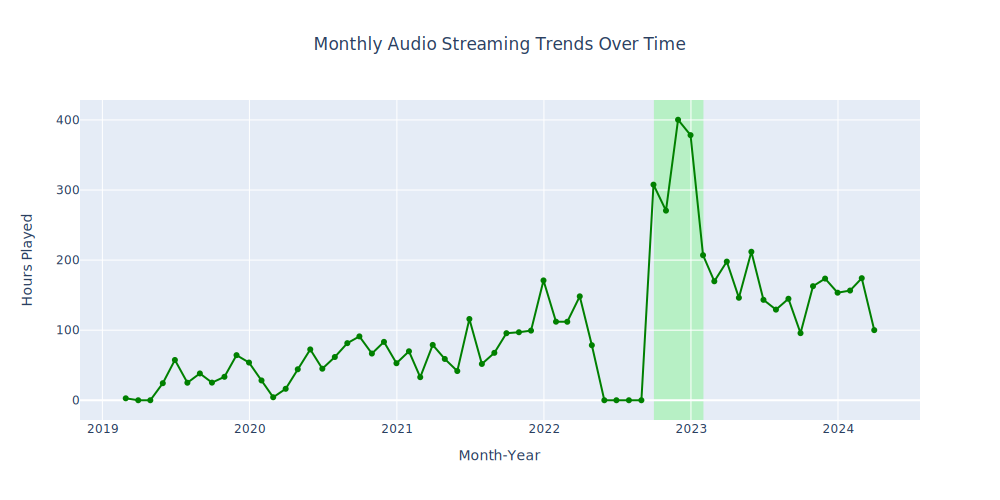

In [38]:
# Set 'ts' column as the index
indexed = spotify_data.set_index('ts', inplace=False)

# Resample the data on a monthly basis
streaming_trends = indexed.resample('M').sum()

# Create a line plot using Plotly Express
fig = px.line(streaming_trends, x=streaming_trends.index, y=(streaming_trends['ms_played'] / (1000 * 60 * 60)).round(2),
              labels={'ts': 'Month-Year', 'y': 'Hours Played'},
              title='Monthly Audio Streaming Trends Over Time',
              color_discrete_sequence=['green'], markers=True)

fig.add_vrect(x0="2022-10-01", x1="2023-02-01", fillcolor="rgba(0,255,0,0.2)", layer="below", line_width=0)

fig.update_layout(title=dict(text='Monthly Audio Streaming Trends Over Time', x=0.5),
                  xaxis_title='Month-Year',
                  yaxis_title='Hours Played',
                  width=1000, height=500)
fig.show()

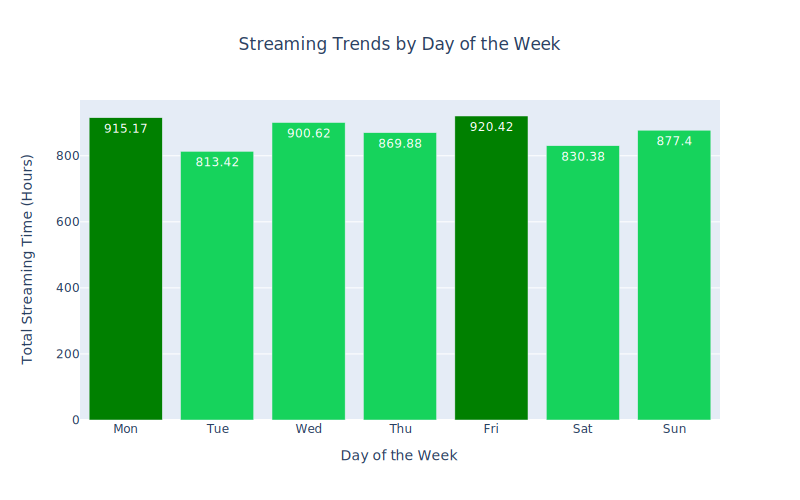

In [39]:
# Analyze trends based on the day of the week
trends_by_day = spotify_data.groupby(spotify_data['ts'].dt.dayofweek).agg({
    'ms_played': lambda x: x.sum() / (1000 * 60 * 60)  # Convert milliseconds to hours and sum
}).reset_index()

# Get the top 2 days of the week
top_days = trends_by_day.nlargest(2, 'ms_played').index

# Visualize the trends
fig = px.bar(trends_by_day, x='ts', y='ms_played',
             labels={'ms_played': 'Total Streaming Time (Hours)', 'ts': 'Day of the Week'},
             title='Streaming Trends by Day of the Week')

colors = ['green' if i in top_days else '#16D35C' for i in trends_by_day.index]

fig.update_traces(marker_color=colors,
                  text=trends_by_day['ms_played'].round(2), 
                  textposition='inside', 
                  textfont=dict(color='white'))

fig.update_layout(xaxis=dict(tickmode='array', tickvals=list(range(7)), ticktext=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']),
                  title=dict(text='Streaming Trends by Day of the Week', x=0.5),
                  width=800, height=500)
fig.show()

#### **Music Streaming**

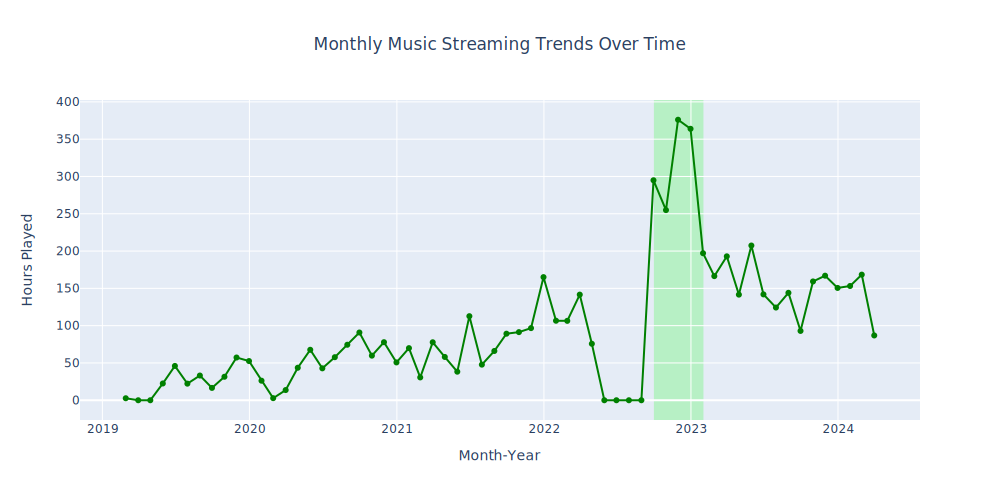

In [40]:
# Set 'ts' column as the index
indexed = spotify_music.set_index('ts', inplace=False)

# Resample the data on a monthly basis
streaming_trends = indexed.resample('M').sum()

# Create a line plot using Plotly Express
fig = px.line(streaming_trends, x=streaming_trends.index, y=(streaming_trends['ms_played'] / (1000 * 60 * 60)).round(2),
              labels={'ts': 'Month-Year', 'y': 'Hours Played'},
              title='Monthly Audio Streaming Trends Over Time',
              color_discrete_sequence=['green'], markers=True)

fig.add_vrect(x0="2022-10-01", x1="2023-02-01", fillcolor="rgba(0,255,0,0.2)", layer="below", line_width=0)

fig.update_layout(title=dict(text='Monthly Music Streaming Trends Over Time', x=0.5),
                  xaxis_title='Month-Year',
                  yaxis_title='Hours Played',
                  width=1000, height=500)
fig.show()

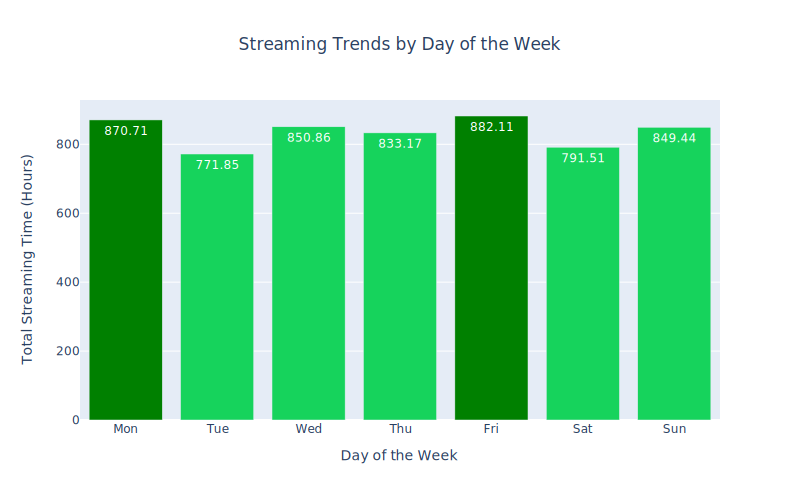

In [41]:
# Analyze trends based on the day of the week
trends_by_day = spotify_music.groupby(spotify_data['ts'].dt.dayofweek).agg({
    'ms_played': lambda x: x.sum() / (1000 * 60 * 60)  # Convert milliseconds to hours and sum
}).reset_index()

# Get the top 2 days of the week
top_days = trends_by_day.nlargest(2, 'ms_played').index

# Visualize the trends
fig = px.bar(trends_by_day, x='ts', y='ms_played',
             labels={'ms_played': 'Total Streaming Time (Hours)', 'ts': 'Day of the Week'},
             title='Streaming Trends by Day of the Week')

colors = ['green' if i in top_days else '#16D35C' for i in trends_by_day.index]

fig.update_traces(marker_color=colors,
                  text=trends_by_day['ms_played'].round(2), 
                  textposition='inside', 
                  textfont=dict(color='white'))

fig.update_layout(xaxis=dict(tickmode='array', tickvals=list(range(7)), ticktext=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']),
                  title=dict(text='Streaming Trends by Day of the Week', x=0.5),
                  width=800, height=500)
fig.show()

#### **Podcast Streaming**

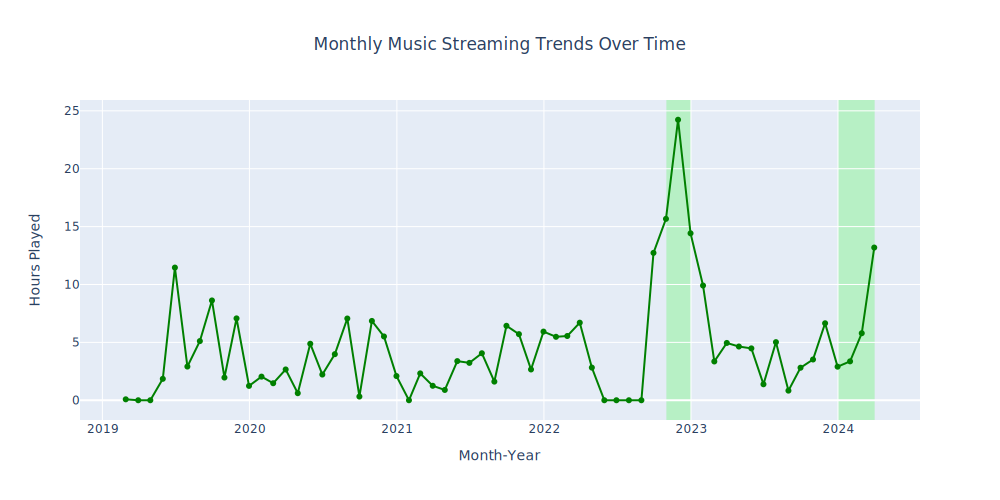

In [42]:
# Set 'ts' column as the index
indexed = spotify_podcast.set_index('ts', inplace=False)

# Resample the data on a monthly basis
streaming_trends = indexed.resample('M').sum()

# Create a line plot using Plotly Express
fig = px.line(streaming_trends, x=streaming_trends.index, y=(streaming_trends['ms_played'] / (1000 * 60 * 60)).round(2),
              labels={'ts': 'Month-Year', 'y': 'Hours Played'},
              title='Monthly Audio Streaming Trends Over Time',
              color_discrete_sequence=['green'], markers=True)

fig.add_vrect(x0="2022-11-01", x1="2023-01-01", fillcolor="rgba(0,255,0,0.2)", layer="below", line_width=0)
fig.add_vrect(x0="2024-01-01", x1="2024-04-01", fillcolor="rgba(0,255,0,0.2)", layer="below", line_width=0)

fig.update_layout(title=dict(text='Monthly Music Streaming Trends Over Time', x=0.5),
                  xaxis_title='Month-Year',
                  yaxis_title='Hours Played',
                  width=1000, height=500)
fig.show()

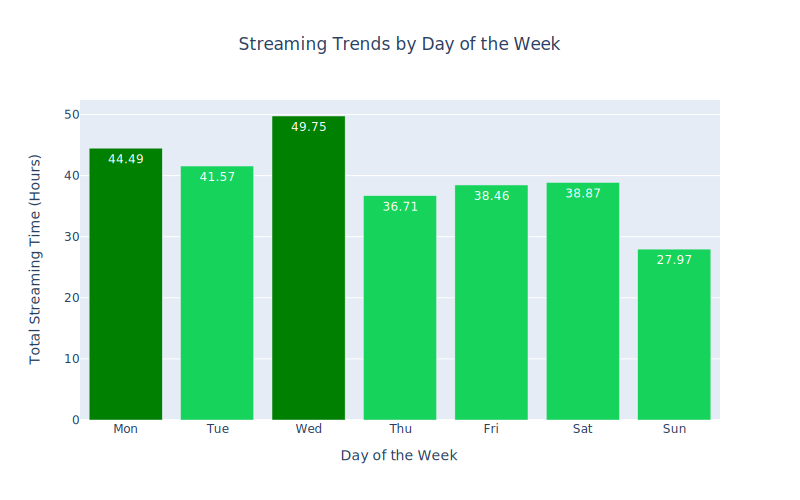

In [43]:
# Analyze trends based on the day of the week
trends_by_day = spotify_podcast.groupby(spotify_podcast['ts'].dt.dayofweek).agg({
    'ms_played': lambda x: x.sum() / (1000 * 60 * 60)  # Convert milliseconds to hours and sum
}).reset_index()

# Get the top 2 days of the week
top_days = trends_by_day.nlargest(2, 'ms_played').index

# Visualize the trends
fig = px.bar(trends_by_day, x='ts', y='ms_played',
             labels={'ms_played': 'Total Streaming Time (Hours)', 'ts': 'Day of the Week'},
             title='Streaming Trends by Day of the Week')

colors = ['green' if i in top_days else '#16D35C' for i in trends_by_day.index]

fig.update_traces(marker_color=colors,
                  text=trends_by_day['ms_played'].round(2), 
                  textposition='inside', 
                  textfont=dict(color='white'))

fig.update_layout(xaxis=dict(tickmode='array', tickvals=list(range(7)), ticktext=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']),
                  title=dict(text='Streaming Trends by Day of the Week', x=0.5),
                  width=800, height=500)
fig.show()

### **`Platform` Analysis**

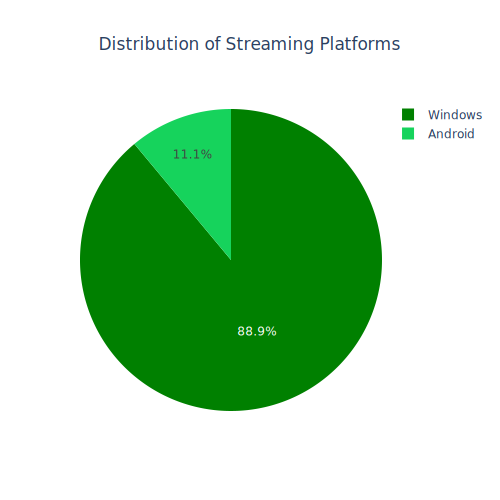

In [44]:
# Calculate platform counts
platform_counts = spotify_data['platform'].value_counts()

# Create a pie chart
fig = px.pie(platform_counts, values=platform_counts.values, names=platform_counts.index,
             title='Distribution of Streaming Platforms')

# Customize the appearance
fig.update_traces(marker=dict(colors=['green', '#16D35C']))  # Set custom colors
fig.update_layout(title={'text': 'Distribution of Streaming Platforms', 'x': 0.5})  # Center the title
fig.update_layout(width=500, height=500)

fig.show()

### **Analysis of `Show Name`**

#### **Based on `Playback Duration`**

In [45]:
# Calculate the accumulated number of streams for each artist in hours
showname_playback_duration = spotify_data.groupby('episode_show_name')['ms_played'].sum() / (1000 * 60 * 60)

# Sort artists based on the accumulated number of streams, from most to least
showname_playback_duration = showname_playback_duration.sort_values(ascending=False).head(20).reset_index()
showname_playback_duration

,episode_show_name,ms_played
0,Mishary Rashid Alafasy,27.971994
1,Rintik Sedu,19.422181
2,DataFramed,13.877386
3,PodQuest,9.767602
4,"Kuas, Kanvas dan Bulan Kesepian",7.600316
5,YOASOBI THE BOOK 2 Spotify Edition,7.392940
6,Zenius Learning,6.584304
7,The Friday Podcast,5.433518
8,Data Talks,5.317237
9,Calm it Down,5.160765


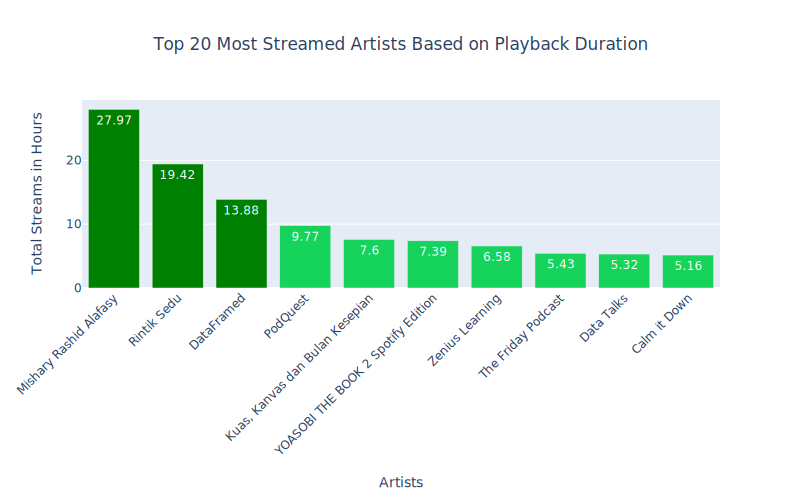

In [46]:
# Visualize top artists
fig = px.bar(showname_playback_duration.head(10), x='episode_show_name', y='ms_played',
             labels={'episode_show_name': 'Artists', 'ms_played': 'Total Streams in Hours'},
             title='Top 20 Most Streamed Artists Based on Playback Duration')

# Define colors using Spotify palette for top 5 tracks, green for others
color_scale = ['green' if artist in showname_playback_duration.head(3).values else '#16D35C' for artist in showname_playback_duration['episode_show_name']]

# Update colors and text labels for each bar
fig.update_traces(marker_color=color_scale,
                  text=showname_playback_duration['ms_played'].round(2), 
                  textposition='inside', 
                  textfont=dict(color='white'))

fig.update_layout(xaxis_title='Artists', 
                  yaxis_title='Total Streams in Hours', 
                  xaxis_tickangle=-45, showlegend=False, title_x=0.5,
                  width=800, height=500)
fig.show()

#### **Based on `Play Count`**

In [47]:
# The top 20 artists with the most number of streams based on play counts
showname_play_counts = spotify_podcast['episode_show_name'].value_counts().head(20)
showname_play_counts

episode_show_name
Mishary Rashid Alafasy                343
Rintik Sedu                           197
YOASOBI THE BOOK 2 Spotify Edition     86
Menjadi Manusia                        77
The Late Brunch with Sara Neyrhiza     51
Kuas, Kanvas dan Bulan Kesepian        47
quranreview                            45
Yaqeen Podcast                         39
PodQuest                               37
MengAnalisa                            34
Calm it Down                           33
Meditate with Tsamara                  30
Podcast Raditya Dika                   28
Zenius Learning                        28
WORK LIFE TRAMPOLINE                   27
Endgame with Gita Wirjawan             25
Mudacumasekali                         25
The Friday Podcast                     23
DataFramed                             23
BukaTalks                              23
Name: count, dtype: int64

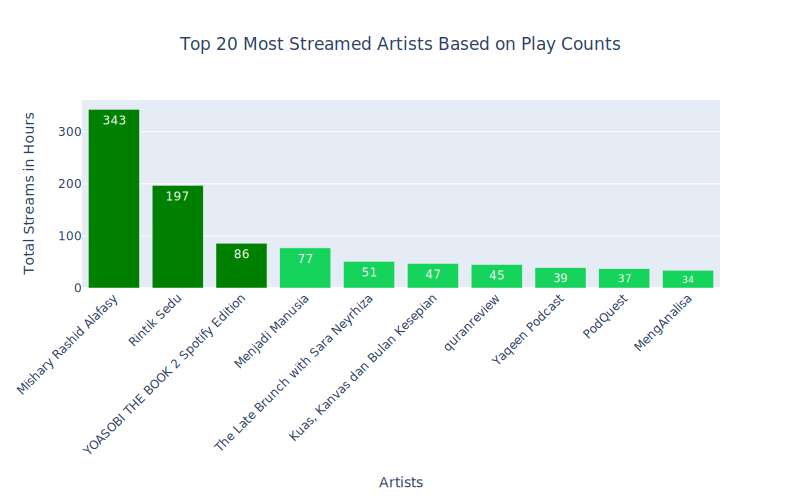

In [48]:
# Visualize top artists
fig = px.bar(showname_play_counts.head(10), x=showname_play_counts.head(10).index, y=showname_play_counts.head(10).values,
             labels={'x': 'Artists', 'y': 'Total Streams'},
             title='Top 20 Most Streamed Artists Based on Play Counts')

# Define colors using Spotify palette for top 5 tracks, green for others
color_scale = ['green' if artist in showname_play_counts.head(3).index else '#16D35C' for artist in showname_play_counts.index]

# Update colors and text labels for each bar
fig.update_traces(marker_color=color_scale,
                  text=showname_play_counts.values, 
                  textposition='inside', 
                  textfont=dict(color='white'))

fig.update_layout(xaxis_title='Artists', 
                  yaxis_title='Total Streams in Hours', 
                  xaxis_tickangle=-45, showlegend=False, title_x=0.5,
                  width=800, height=500)
fig.show()

### **Analysis of `Artists`**

#### **Based on `Playback Duration`**

In [49]:
# Calculate the accumulated number of streams for each artist in hours
artist_playback_duration = spotify_data.groupby('master_metadata_album_artist_name')['ms_played'].sum() / (1000 * 60 * 60)

# Sort artists based on the accumulated number of streams, from most to least
artist_playback_duration = artist_playback_duration.sort_values(ascending=False).head(10).reset_index()

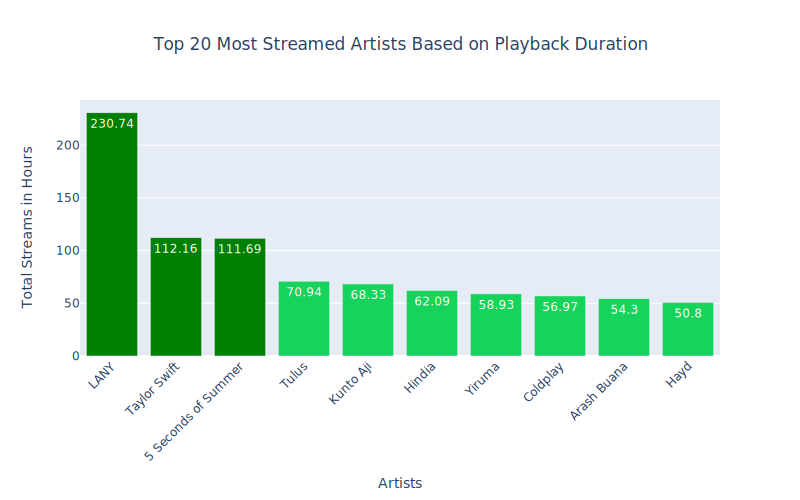

In [50]:
# Visualize top artists
fig = px.bar(artist_playback_duration, x='master_metadata_album_artist_name', y='ms_played',
             labels={'master_metadata_album_artist_name': 'Artists', 'ms_played': 'Total Streams in Hours'},
             title='Top 20 Most Streamed Artists Based on Playback Duration')

# Define colors using Spotify palette for top 5 tracks, green for others
color_scale = ['green' if artist in artist_playback_duration.head(3).values else '#16D35C' for artist in artist_playback_duration['master_metadata_album_artist_name']]

# Update colors and text labels for each bar
fig.update_traces(marker_color=color_scale,
                  text=artist_playback_duration['ms_played'].round(2), 
                  textposition='inside', 
                  textfont=dict(color='white'))

fig.update_layout(xaxis_title='Artists', 
                  yaxis_title='Total Streams in Hours', 
                  xaxis_tickangle=-45, showlegend=False, title_x=0.5,
                  width=800, height=500)
fig.show()

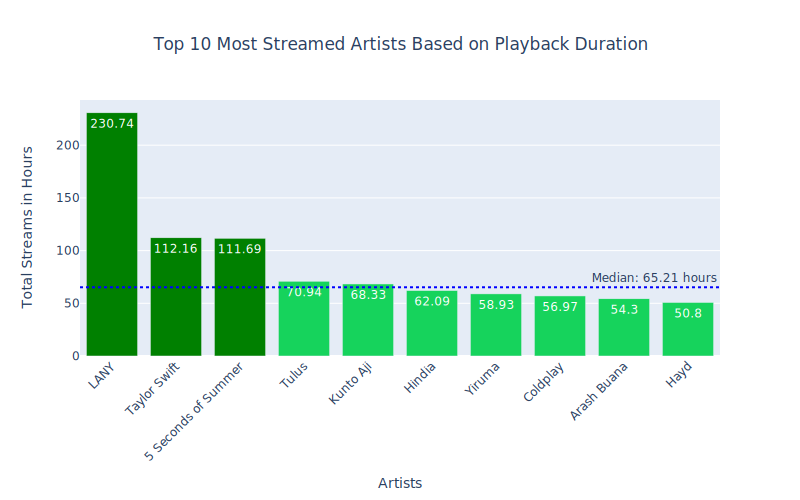

In [51]:
median_playback_duration = artist_playback_duration['ms_played'].median()

# Visualize top artists
fig = px.bar(artist_playback_duration, x='master_metadata_album_artist_name', y='ms_played',
             labels={'master_metadata_album_artist_name': 'Artists', 'ms_played': 'Total Streams in Hours'},
             title='Top 10 Most Streamed Artists Based on Playback Duration')

# Define colors using Spotify palette for top 5 tracks, green for others
color_scale = ['green' if artist in artist_playback_duration.head(3).values else '#16D35C' for artist in artist_playback_duration['master_metadata_album_artist_name']]

# Update colors and text labels for each bar
fig.update_traces(marker_color=color_scale,
                  text=artist_playback_duration['ms_played'].round(2), 
                  textposition='inside', 
                  textfont=dict(color='white'))

# Add median playback duration line
fig.add_hline(y=median_playback_duration, 
              line_dash="dot", line_color="blue", 
              annotation_text=f'Median: {median_playback_duration:.2f} hours',
              annotation_position="top right")

fig.update_layout(xaxis_title='Artists', 
                  yaxis_title='Total Streams in Hours', 
                  xaxis_tickangle=-45, showlegend=False, title_x=0.5,
                  width=800, height=500)
fig.show()

#### **Based on `Play Count`**

In [52]:
# The top 20 artists with the most number of streams based on play counts
artist_play_counts = spotify_data['master_metadata_album_artist_name'].value_counts().head(10)

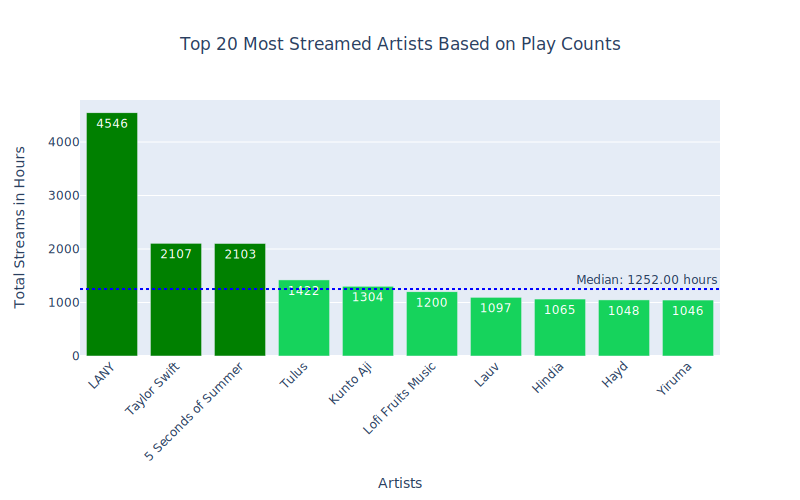

In [53]:
median_play_counts = artist_play_counts.median()

# Visualize top artists
fig = px.bar(artist_play_counts, x=artist_play_counts.index, y=artist_play_counts.values,
             labels={'x': 'Artists', 'y': 'Total Streams'},
             title='Top 20 Most Streamed Artists Based on Play Counts')

# Define colors using Spotify palette for top 5 tracks, green for others
color_scale = ['green' if artist in artist_play_counts.head(3).index else '#16D35C' for artist in artist_play_counts.index]

# Update colors and text labels for each bar
fig.update_traces(marker_color=color_scale,
                  text=artist_play_counts.values, 
                  textposition='inside', 
                  textfont=dict(color='white'))

# Add median playback duration line
fig.add_hline(y=median_play_counts, 
              line_dash="dot", line_color="blue", 
              annotation_text=f'Median: {median_play_counts:.2f} hours',
              annotation_position="top right")

fig.update_layout(xaxis_title='Artists', 
                  yaxis_title='Total Streams in Hours', 
                  xaxis_tickangle=-45, showlegend=False, title_x=0.5,
                  width=800, height=500)
fig.show()

### **Analysis of `Albums`**

In [54]:
album_playback_duration = spotify_data.groupby('master_metadata_album_album_name')['ms_played'].sum() / (1000 * 60)
album_play_counts = spotify_data['master_metadata_album_album_name'].value_counts()

In [55]:
# Create a DataFrame with album names, artist names, and play times
album_metadata = spotify_data[['master_metadata_album_album_name', 'master_metadata_album_artist_name']]
album_metadata.drop_duplicates(inplace=True)  # Remove duplicate rows
album_metadata.set_index('master_metadata_album_album_name', inplace=True)

# Merge album_metadata with album_playback_duration
merged_data = album_metadata.merge(album_playback_duration, left_index=True, right_index=True)

# Merge merged_data with album_play_counts
merged_data = merged_data.merge(album_play_counts, left_index=True, right_index=True)

In [56]:
# Rename the columns for clarity
merged_data.columns = ['Artist Name', 'Playback Duration', 'Play Counts']

# Reset index to turn the index into a regular column
merged_data.reset_index(inplace=True)

# Set the desired name for the index column
merged_data.rename(columns={'master_metadata_album_album_name': 'Album Name'}, inplace=True)

In [57]:
# Group by album name
grouped_data = merged_data.groupby('Album Name')

# Initialize an empty list to store filtered data
filtered_data = []

# Iterate through each group
for album, group in grouped_data:
    # Check if the album has more than one artist
    if len(group['Artist Name'].unique()) > 1:
        # Take only the first artist entry
        filtered_data.append(group.head(1))
    else:
        # If only one artist, keep all entries
        filtered_data.append(group)

# Concatenate all filtered groups into a single DataFrame
filtered_merged_data = pd.concat(filtered_data)

# Show the top 20 albums with the most play time
top_albums = filtered_merged_data.nlargest(20, 'Playback Duration')
print("\nTop 20 Albums by Playback Duration (in Minutes):\n", top_albums.to_string(index=False, float_format="{:.2f}".format))


Top 20 Albums by Playback Duration (in Minutes):
                              Album Name         Artist Name  Playback Duration  Play Counts
                               gg bb xx                LANY            3039.83         1084
                 Menari Dengan Bayangan              Hindia            2745.03          791
                          Malibu Nights                LANY            2528.48          811
                             mama's boy                LANY            2519.52          834
                              Midnights        Taylor Swift            2417.14          796
                          Mantra Mantra           Kunto Aji            2299.69          675
                                   LANY                LANY            2278.33          703
         The Feeling of Falling Upwards 5 Seconds of Summer            2251.92          593
                             logic mess         Arash Buana            1833.99          589
                      ~how i'

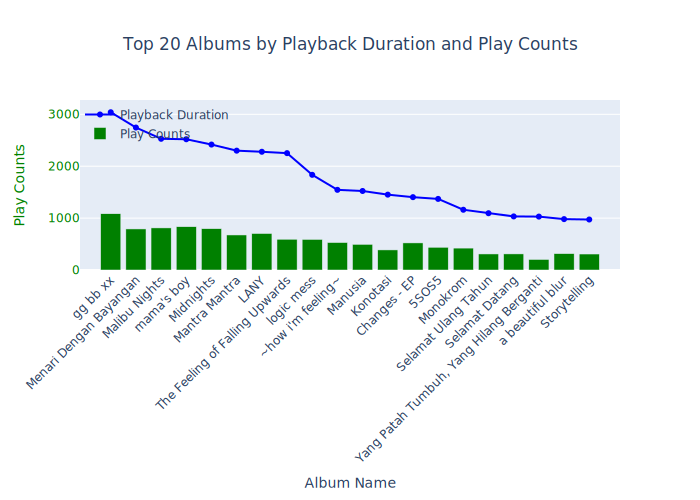

In [58]:
import plotly.graph_objects as go

# Create traces for playback duration (line) and play counts (bars)
trace_duration = go.Scatter(x=top_albums['Album Name'], y=top_albums['Playback Duration'],
                            mode='lines+markers', name='Playback Duration', line=dict(color='blue'))
trace_counts = go.Bar(x=top_albums['Album Name'], y=top_albums['Play Counts'],
                      name='Play Counts', marker=dict(color='green'))

# Create layout for the chart with a secondary y-axis
layout = go.Layout(title='Top 20 Albums by Playback Duration and Play Counts', title_x=0.5,
                   xaxis=dict(title='Album Name', tickangle=-45),
                   yaxis=dict(title='Play Counts', side='left', color='green'),
                   yaxis2=dict(title='Playback Duration', side='right', overlaying='y', color='blue'),
                   legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'),
                   barmode='group')

fig = go.Figure(data=[trace_duration, trace_counts], layout=layout)
fig.show()

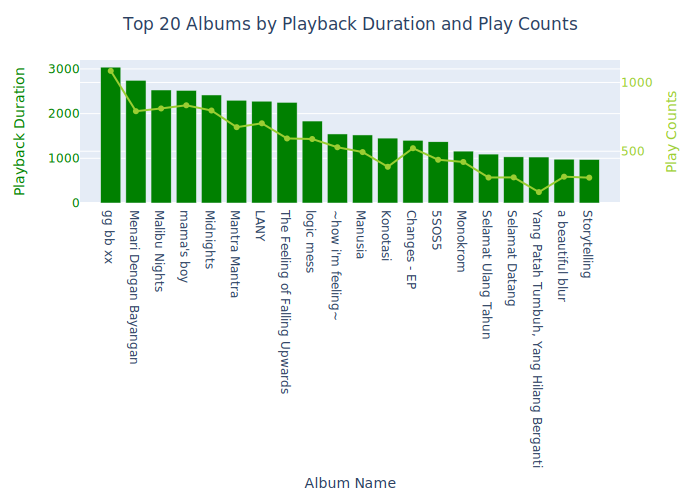

In [59]:
# Create a bar plot for playback duration
fig = px.bar(top_albums, x='Album Name', y='Playback Duration',
             color_discrete_sequence=['green'], labels={'Playback Duration': 'Playback Duration'})

# Add a line plot for play counts
fig.add_scatter(x=top_albums['Album Name'], y=top_albums['Play Counts'], 
                mode='lines+markers', name='Play Counts', yaxis='y2', line=dict(color='yellowgreen'))

# Update layout with secondary y-axis and remove legend
fig.update_layout(title='Top 20 Albums by Playback Duration and Play Counts', title_x=0.5,
                  xaxis_title='Album Name', yaxis_title='Playback Duration',
                  yaxis=dict(title='Playback Duration', color='green'),
                  yaxis2=dict(title='Play Counts', color='yellowgreen', overlaying='y', side='right'),
                  showlegend=False)

fig.update_traces(hovertemplate="<b>%{x}</b><br>Playback Duration: %{y:.2f}<extra></extra>", selector=dict(type='bar')) # Hover data for the bar plot
fig.update_traces(hovertemplate="<b>%{x}</b><br>Play Counts: %{y}<extra></extra>", selector=dict(type='scatter')) # Hover data for the line plot
fig.show()

### **Analysis of `Tracks`**

#### **Yearly Music Analysis Trend Overview**

In [60]:
# Extract year from timestamp
spotify_data['year'] = spotify_data['ts'].dt.year

# Group the data by year and count the number of songs
grouped_data = spotify_data.groupby('year').size().reset_index(name='song_count')

# Sort the data by year
grouped_data = grouped_data.sort_values(by='year')

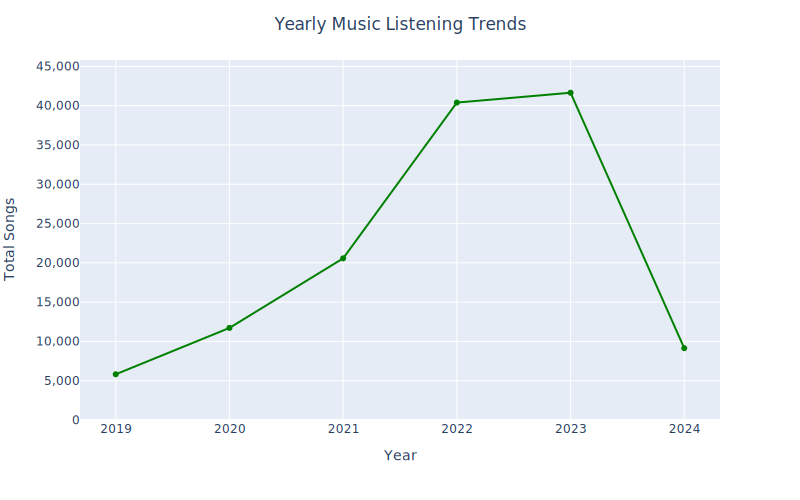

In [61]:
fig = px.line(grouped_data, x='year', y='song_count',
              labels={'year': 'Year', 'song_count': 'Total Songs'},
              color_discrete_sequence=['green'],
              markers=True)

fig.update_layout(title=dict(text='Yearly Music Listening Trends', x=0.5),
                  xaxis_title='Year',
                  yaxis_title='Total Songs',
                  width=800, height=500,
                  yaxis=dict(tickformat=',.0f', range=[0, grouped_data['song_count'].max() * 1.1]))
fig.show()

##### **Top Songs and Top Artist 2019**

##### **Top Songs and Top Artist 2020**

##### **Top Songs and Top Artist 2021**

##### **Top Songs and Top Artist 2022**

##### **Top Songs and Top Artist 2023**

#### **Yearly Podcast Analysis Trend Overview**

In [62]:
# Group the data by year and count the number of songs
grouped_data = spotify_podcast.groupby(spotify_podcast['ts'].dt.year).size().reset_index(name='podcast_count')

# Rename the columns
grouped_data.columns = ['year', 'podcast_count']

# Sort the data by year
grouped_data = grouped_data.sort_values(by='year')

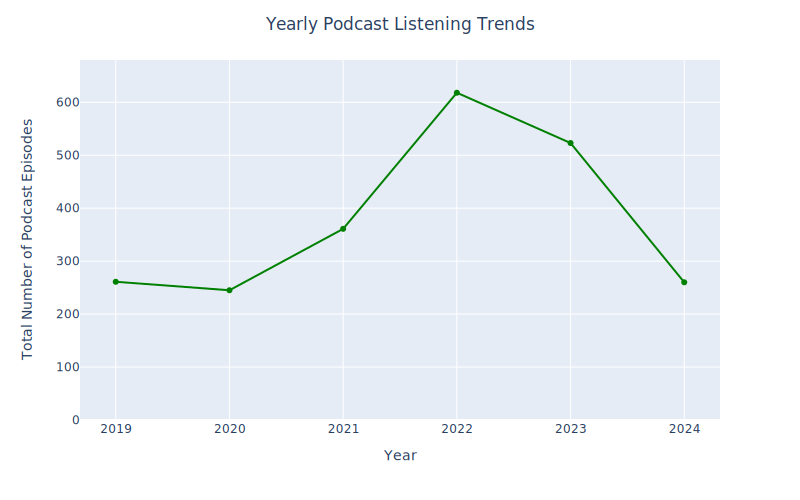

In [63]:
fig = px.line(grouped_data, x='year', y='podcast_count',
              labels={'year': 'Year', 'podcast_count': 'Total Episode'},
              color_discrete_sequence=['green'],
              markers=True)

fig.update_layout(title=dict(text='Yearly Podcast Listening Trends', x=0.5),
                  xaxis_title='Year',
                  yaxis_title='Total Number of Podcast Episodes',
                  width=800, height=500,
                  yaxis=dict(tickformat=',.0f', range=[0, grouped_data['podcast_count'].max() * 1.1]))
fig.show()

#### **Favorite Songs Analysis**

In [64]:
spotify_music.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127026 entries, 5 to 129290
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype              
---  ------                             --------------   -----              
 0   ts                                 127026 non-null  datetime64[ns, UTC]
 1   platform                           127026 non-null  object             
 2   ms_played                          127026 non-null  int64              
 3   master_metadata_track_name         126946 non-null  object             
 4   master_metadata_album_artist_name  126946 non-null  object             
 5   master_metadata_album_album_name   126946 non-null  object             
 6   reason_start                       127026 non-null  object             
 7   reason_end                         127026 non-null  object             
 8   shuffle                            127026 non-null  bool               
 9   skipped                            70840 n

In [65]:
# Calculate the accumulated number of streams for each artist in hours
most_played_songs = (spotify_data.groupby(['master_metadata_album_artist_name', 'master_metadata_track_name'])['ms_played'].sum() / (1000 * 60)).reset_index()

# Sort artists based on the accumulated number of streams, from most to least
list_most_played_songs = most_played_songs.sort_values(by='ms_played', ascending=False).round(2).head(20)
list_most_played_songs

,master_metadata_album_artist_name,master_metadata_track_name,ms_played
2307,Cheon ji won,You Can Cry,935.66
7109,LANY,"the older you get, the less you cry",866.31
7048,LANY,Malibu Nights,864.07
4037,Feby Putri,Runtuh,730.33
6957,Kunto Aji,Rehat,725.18
5044,Hayd,Suffocate,722.41
7061,LANY,Thick And Thin,703.88
6952,Kunto Aji,Pilu Membiru,667.96
2357,Choi Yu Ree,Wish,665.10
14884,push baby,Wishing We Were More Than Friends,652.49


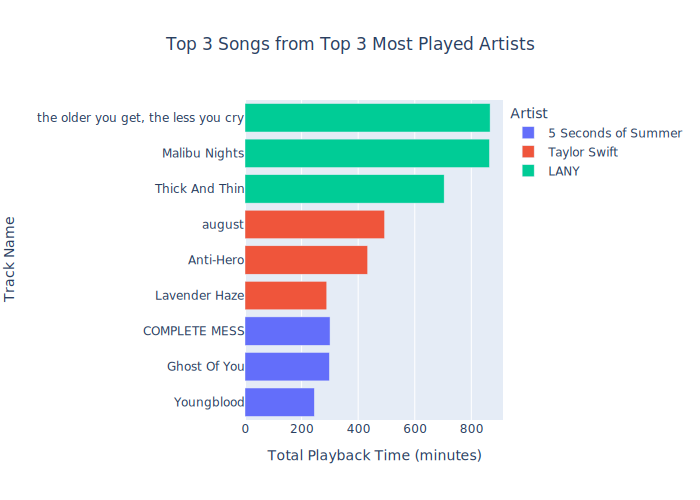

In [66]:
## Sort artists based on the total playback time
top_artists = artist_playback_duration.sort_values(by='ms_played', ascending=False).head(3)['master_metadata_album_artist_name']

# Select the top three songs from each artist and sort them by playback time
top_songs = pd.concat([most_played_songs[most_played_songs['master_metadata_album_artist_name'] == artist].nlargest(3, 'ms_played') for artist in top_artists])
top_songs = top_songs.sort_values(by='ms_played', ascending=True)

# Create a chart displaying the top songs
fig = px.bar(top_songs, x='ms_played', y='master_metadata_track_name', color='master_metadata_album_artist_name', orientation='h',
             labels={'master_metadata_track_name': 'Track Name', 'ms_played': 'Playback Time', 'master_metadata_album_artist_name': 'Artist'},
             title='Top 3 Songs from Top 3 Most Played Artists')

fig.update_layout(xaxis_title='Total Playback Time (minutes)', yaxis_title='Track Name',
                  legend_title='Artist', title_x=0.5, width=700, height=500)

fig.show()

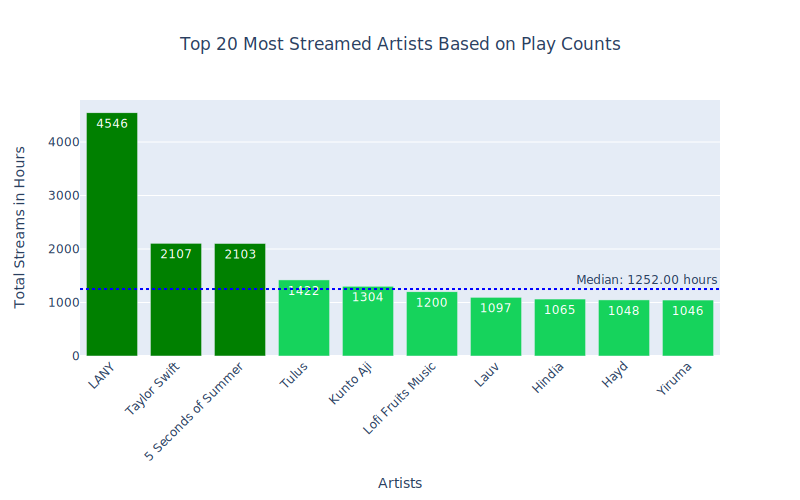

In [67]:
median_play_counts = artist_play_counts.median()

# Visualize top artists
fig = px.bar(artist_play_counts, x=artist_play_counts.index, y=artist_play_counts.values,
             labels={'x': 'Artists', 'y': 'Total Streams'},
             title='Top 20 Most Streamed Artists Based on Play Counts')

# Define colors using Spotify palette for top 5 tracks, green for others
color_scale = ['green' if artist in artist_play_counts.head(3).index else '#16D35C' for artist in artist_play_counts.index]

# Update colors and text labels for each bar
fig.update_traces(marker_color=color_scale,
                  text=artist_play_counts.values, 
                  textposition='inside', 
                  textfont=dict(color='white'))

# Add median playback duration line
fig.add_hline(y=median_play_counts, 
              line_dash="dot", line_color="blue", 
              annotation_text=f'Median: {median_play_counts:.2f} hours',
              annotation_position="top right")

fig.update_layout(xaxis_title='Artists', 
                  yaxis_title='Total Streams in Hours', 
                  xaxis_tickangle=-45, showlegend=False, title_x=0.5,
                  width=800, height=500)
fig.show()

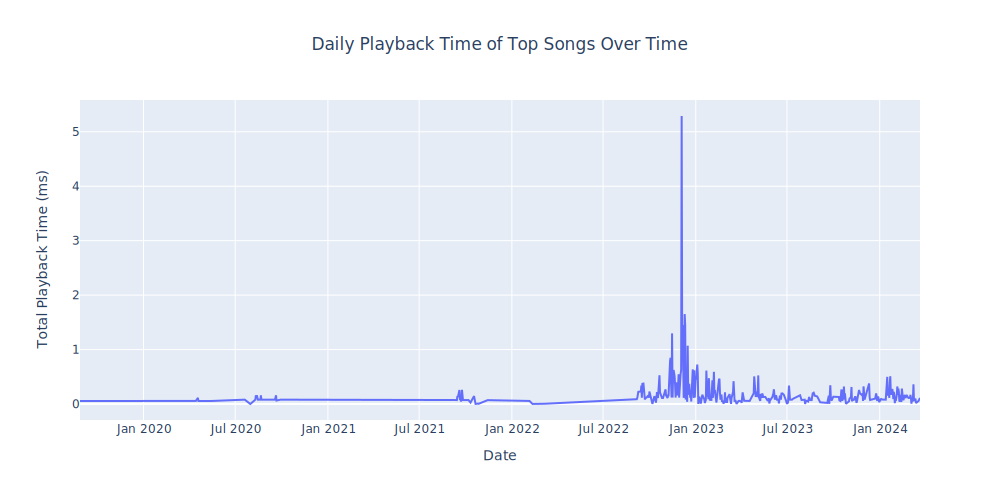

In [68]:
# Filter data untuk hanya menyertakan lagu-lagu top
top_songs_data = spotify_data[spotify_data['master_metadata_track_name'].isin(top_songs['master_metadata_track_name'])]

# Konversi kolom 'ts' ke dalam format datetime
top_songs_data['ts'] = pd.to_datetime(top_songs_data['ts']).dt.date

# Kelompokkan data berdasarkan tanggal dan hitung jumlah total pemutaran lagu-lagu top pada setiap tanggal
daily_playback_counts = (top_songs_data.groupby('ts')['ms_played'].sum() / (1000 * 60 * 60)).reset_index()

# Visualisasikan pola waktu pemutaran lagu-lagu top menggunakan grafik garis
fig = px.line(daily_playback_counts, x='ts', y='ms_played',
              labels={'ts': 'Date', 'ms_played': 'Total Playback Time (ms)'},
              title='Daily Playback Time of Top Songs Over Time')

fig.update_layout(xaxis_title='Date', yaxis_title='Total Playback Time (ms)', title_x=0.5,
                  width=1000, height=500)

fig.show()

In [69]:
# Filter data berdasarkan tanggal 4 Desember
december_4th_data = spotify_data[spotify_data['ts'].dt.date == pd.to_datetime('2023-12-04').date()]

# Kelompokkan data berdasarkan lagu dan hitung total waktu pemutaran untuk setiap lagu
song_playback_duration_december_4th = december_4th_data.groupby(['master_metadata_album_artist_name', 'master_metadata_track_name'])['ms_played'].sum().reset_index()

# Ambil 10 lagu teratas
top_10_songs_december_4th = song_playback_duration_december_4th.nlargest(10, 'ms_played')

# Tampilkan lagu-lagu yang didengarkan, durasi pemutaran, dan nama artis masing-masing lagu
print(top_10_songs_december_4th[['master_metadata_album_artist_name', 'master_metadata_track_name', 'ms_played']])

   master_metadata_album_artist_name master_metadata_track_name  ms_played
78                          The Rose           You're Beautiful    1433622
35                      Reality Club     I Wish I Was Your Joke    1095830
56                          The Rose                 Back To Me    1084332
66                          The Rose                     I.L.Y.     888084
67                          The Rose                   Lifeline     867545
74                          The Rose                       Sour     802324
52                          The Rose                      Alive     781104
28                      Reality Club                       2112     713224
69                          The Rose                   Nauseous     689751
37                      Reality Club              Love Epiphany     677948
